## Atividade 03 - PIC - Parte 1

#### Tema: Questão de concurso

---

Aluno: Abner Vieira Pereira

## Enunciado

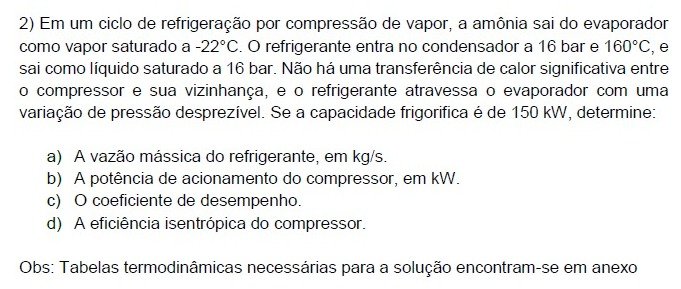

In [19]:
import CoolProp.CoolProp as CP
from numpy import *
import numpy as np
from IPython.display import Math
import matplotlib.pyplot as plt
from pandas import *
import pandas as pd

In [ ]:
# Declarando variáveis
Q_1 = 1
T_1 = -22 + 273.15
P_2 = 16e5   
T_2 = 160 + 273.15
P_3 = P_2
Q_3 = 0
fluido_trabalho = 'Ammonia'
Q_ponto = 150


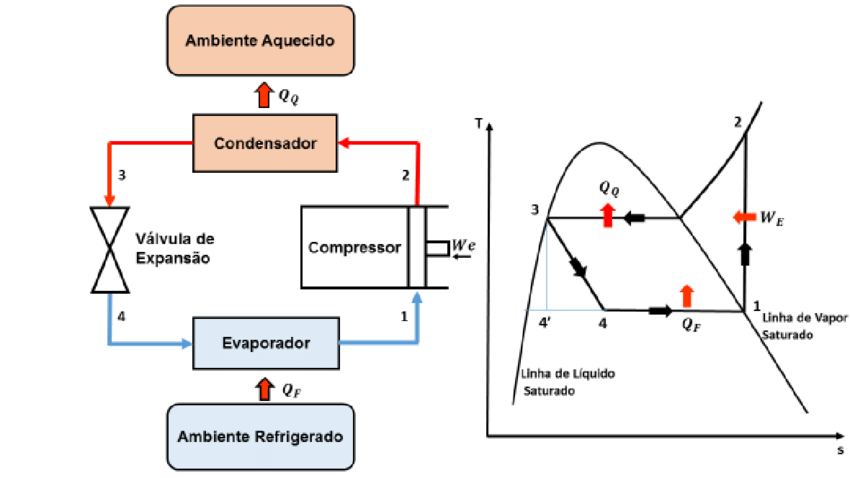

## Estado 1

In [21]:
P_1 = CP.PropsSI('P','T',T_1,'Q',Q_1,fluido_trabalho)
P_1_conv = P_1/1000
display(Math(r'P_{1} = %.3f kPa'%P_1_conv))

<IPython.core.display.Math object>

In [22]:
h1 = CP.PropsSI('H','T',T_1,'Q',Q_1,fluido_trabalho)
h1_conv = h1/1000
display(Math(r'h_{1} = % .3f \, kJ/kg'%h1_conv))

<IPython.core.display.Math object>

In [23]:
s1 = CP.PropsSI('S','T',T_1,'Q',Q_1,fluido_trabalho)
s1_conv = s1/1000
display(Math(r's_{1} = %.3f \, kJ/kg°C '%s1_conv))

<IPython.core.display.Math object>

## Estado 2

In [24]:
s2 = s1

In [25]:
h2_s = CP.PropsSI('H','P',P_2,'S',s2,fluido_trabalho)
h2_s_conv = h2_s/1000
display(Math(r'h_{2,s} = %.3f \, kJ/kg'%h2_s_conv))

<IPython.core.display.Math object>

In [26]:
h2 = CP.PropsSI('H','P',P_2,'T',T_2,fluido_trabalho)
h2_conv = h2/1000
display(Math(r'h_{2} = %.3f \, kJ/kg'%h2_conv))

<IPython.core.display.Math object>

### Eficiência Isentrópica

$$\eta_{c} = \dfrac{h_{2,s} - h_1}{h_2 - h_1}$$

In [27]:
eta_c = (h2_s_conv - h1_conv ) / (h2_conv - h1_conv)
eta_c *= 100
display(Math(r'\eta_{c} = %.3f \, '%eta_c))

<IPython.core.display.Math object>

## Estado 3

In [28]:
h3 = CP.PropsSI('H','P',P_3,'Q',Q_3,fluido_trabalho)
h3_conv = h3/1000
display(Math(r'h_{3} = %3.f kJ/kg'%h3_conv))

<IPython.core.display.Math object>

## Estado 4

In [29]:
h4 = h3
h4_conv = h4/1000
P_4 = P_1

In [30]:
T4 = CP.PropsSI('T','P',P_4,'H',h4,fluido_trabalho)
T4_C = T4 - 273.15
display(Math(r'T_{4} = %.3f \,°C'%T4_C))

<IPython.core.display.Math object>

In [31]:
Q_4 = CP.PropsSI('Q','P',P_4,'H',h4,fluido_trabalho)
display(Math(r'Q_{4} = %.3f \, '%Q_4))

<IPython.core.display.Math object>

A vazão mássica do refrigerante pode ser determinado a partir da seguinte equação:

$$\dot{m} = \frac{\dot{Q}_{ref}}  {h_1 - h_4}$$

In [32]:
m_ponto = Q_ponto/(h1_conv - h4_conv)
display(Math(r'\dot{m} = %.3f \, kg/s' %m_ponto))

<IPython.core.display.Math object>

A potência do compressor pode ser determinada por:

$$\dot{W}_{comp} = \dot{m} \times (h_2 - h_1)$$

In [33]:
W_ponto = m_ponto * (h2_conv - h1_conv)
display(Math(r'\dot{W}_{comp} = %.3f \, kW'%W_ponto))

<IPython.core.display.Math object>

O coeficiente de desempenho é dado por:

$$COP = \dfrac{\dot{Q}_{evap}}{\dot{W}_{comp}}$$

In [34]:
COP = Q_ponto/W_ponto
display(Math(r'COP = %.3f \,'%COP))

<IPython.core.display.Math object>

## Plotando o gráfico P-h

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20740\1569309487.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([h1_conv,h2_conv,h3_conv,h4_conv,h1_conv],


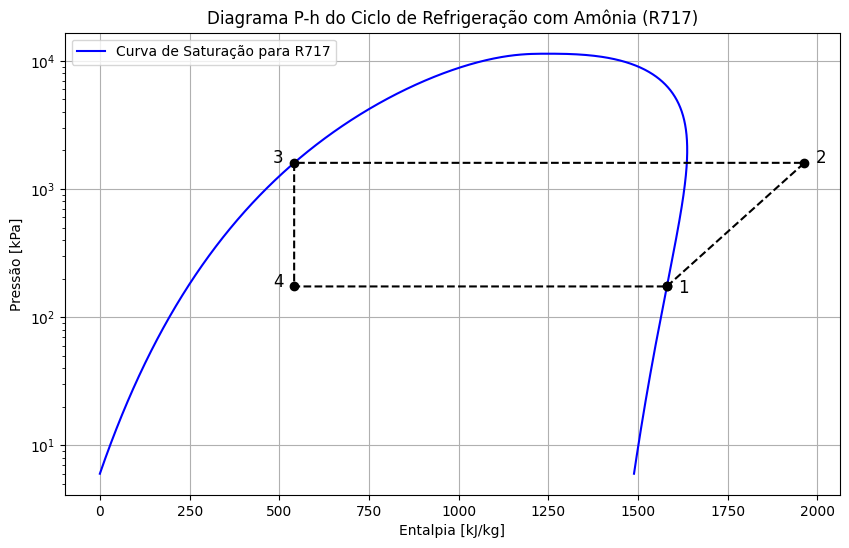

In [35]:
# Definindo os limites de temperatura válidos para amônia (R717)
T_min = 195.4  # Temperatura mínima válida para R717
T_max = 405.55  # Ligeiramente abaixo da temperatura crítica para evitar erro

# Criando os vetores de temperatura
T_values = np.linspace(T_min, T_max, 1000)

# Calculando as entalpias de saturação (kJ/kg)
h_liq = [CP.PropsSI('H', 'T', T, 'Q', 0, fluido_trabalho) / 1000 for T in T_values]  # Saturação Líquido
h_vap = [CP.PropsSI('H', 'T', T, 'Q', 1, fluido_trabalho) / 1000 for T in T_values]  # Saturação Vapor

# Calculando as pressões de saturação
P_values = [CP.PropsSI('P', 'T', T, 'Q', 0, fluido_trabalho) / 1e3 for T in T_values]

# Criando um vetor de entalpia unificado
h_values = np.concatenate((h_liq, h_vap[::-1]))  # Concatena valores de líquido e vapor
P_values_combined = np.concatenate((P_values, P_values[::-1]))  # Concatena pressão

# Plotando a curva de saturação
plt.figure(figsize=(10, 6))
plt.plot(h_values, P_values_combined, label='Curva de Saturação para R717', color='blue')

# Plotando o ciclo de refrigeração
plt.plot([h1_conv,h2_conv,h3_conv,h4_conv,h1_conv],
         [P_1/1e3,P_2/1e3,P_3/1e3,P_4/1e3,P_1/1e3],
         'k--', marker='o', color='black')

plt.text(h1_conv + 60 , (P_1 / 1e3)-20, '1', fontsize=12, ha='right', color='black')
plt.text(h2_conv + 60, P_2 / 1e3, '2', fontsize=12, ha='right', color='black')
plt.text(h3_conv - 30 , P_3 / 1e3, '3', fontsize=12, ha='right', color='black')
plt.text(h4_conv -30 , P_4 / 1e3, '4', fontsize=12, ha='right', color='black')

# Configurações do gráfico
plt.title('Diagrama P-h do Ciclo de Refrigeração com Amônia (R717)')
plt.xlabel('Entalpia [kJ/kg]')
plt.ylabel('Pressão [kPa]')
plt.yscale('log')  # Escala logarítmica para a pressão
plt.grid(True)
plt.legend()
plt.show()


## Respostas

In [37]:
results = {
    'Vazão mássica do refirgerante [kg/s]':[round(m_ponto,3)],
    'Potência de acionamento do compressor [kW]':[round(W_ponto,3)],
    'COP':[round(COP,2)],
    'Eficiência Isoentrópica[%]':[round(eta_c,3)]
}

results = pd.DataFrame(results)
display(results)

,Vazão mássica do refirgerante [kg/s],Potência de acionamento do compressor [kW],COP,Eficiência Isoentrópica[%]
0,0.144,55.358,2.71,88.697
